<a href="https://colab.research.google.com/github/HitenGambhir/Restaurant_review_Analyzer/blob/main/Restaurant1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score is : 0.73


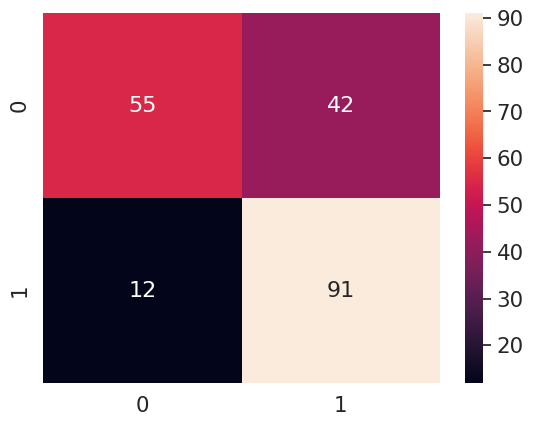

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

import re
import nltk
# Download the stopwords dataset
nltk.download('stopwords')  # This line downloads the required dataset
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
# Convert the output of fit_transform to a NumPy array instead of a matrix
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)

In [13]:
feedback = ""

newReview = ""

newReview = "The food was Amazing"

def predict(new_review):

        new_review = re.sub("[^a-zA-Z]", " ", new_review)

        new_review = new_review.lower().split()

        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]

        new_review = " ".join(new_review)

        new_review = [new_review]

        new_review = cv.transform(new_review).toarray()

        if classifier.predict(new_review)[0] == 1:

            return "Positive"

        else:

            return "Negative"



feedback = predict(newReview)

print("This review is: ", feedback)


This review is:  Positive


In [14]:
feedback = ""

newReview = ""

newReview = "The food was terrible"

def predict(new_review):

        new_review = re.sub("[^a-zA-Z]", " ", new_review)

        new_review = new_review.lower().split()

        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]

        new_review = " ".join(new_review)

        new_review = [new_review]

        new_review = cv.transform(new_review).toarray()

        if classifier.predict(new_review)[0] == 1:

            return "Positive"

        else:

            return "Negative"



feedback = predict(newReview)

print("This review is: ", feedback)

This review is:  Negative
